In [1]:
import pandas as pd

In [2]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

In [5]:
# Предположим, что у нас есть DataFrame data с колонками age и sex
# Сначала создадим таблицу с нормальными значениями давления
pressure_data = {
    'age_group': ['до 20', '21-30', '31-40', '41-50', '51-60', '61 и старше'],
    'male': [123, 126, 129, 135, 142, 142],
    'female': [116, 120, 127, 137, 144, 159]
}

pressure_df = pd.DataFrame(pressure_data)

# Добавляем функцию для определения возрастной группы
def get_age_group(age):
    if age <= 20:
        return 'до 20'
    elif 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return '61 и старше'

# Определяем среднее давление на основе возраста и пола
def get_trestbps_mean(age, sex):
    age_group = get_age_group(age)
    if sex == 1:  # Мужчина
        return pressure_df.loc[pressure_df['age_group'] == age_group, 'male'].values[0]
    else:  # Женщина
        return pressure_df.loc[pressure_df['age_group'] == age_group, 'female'].values[0]

# Добавляем новый признак в DataFrame data
heart['trestbps_mean'] = heart.apply(lambda row: get_trestbps_mean(row['age'], row['sex']), axis=1)

# Выводим значение признака trestbps_mean для пациента под номером 300
print(heart.loc[300, 'trestbps_mean'])
heart

142


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


In [7]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cp','restecg','slope','ca','thal'])
cols = encoder.fit_transform(heart[['cp','restecg','slope','ca','thal']])
heart = pd.concat([heart, cols], axis=1)
heart = heart.drop(['cp','restecg','slope','ca','thal'], axis=1)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

c:\Users\Oleg.Atamanov\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Oleg.Atamanov\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Oleg.Atamanov\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\

In [8]:
heart.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
heart['trestbps'] = r_scaler.fit_transform(heart[['trestbps']])
heart['chol'] = r_scaler.fit_transform(heart[['chol']])
heart['fbs'] = r_scaler.fit_transform(heart[['fbs']])
heart['thalach'] = r_scaler.fit_transform(heart[['thalach']])
heart['oldpeak'] = r_scaler.fit_transform(heart[['oldpeak']])
heart['age'] = s_scaler.fit_transform(heart[['age']])
heart.describe()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,0.683168,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,0.544554,0.260726,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,1.001654e+00,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-2.797624e+00,0.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.316189e-01,1.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.496240e+00,1.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

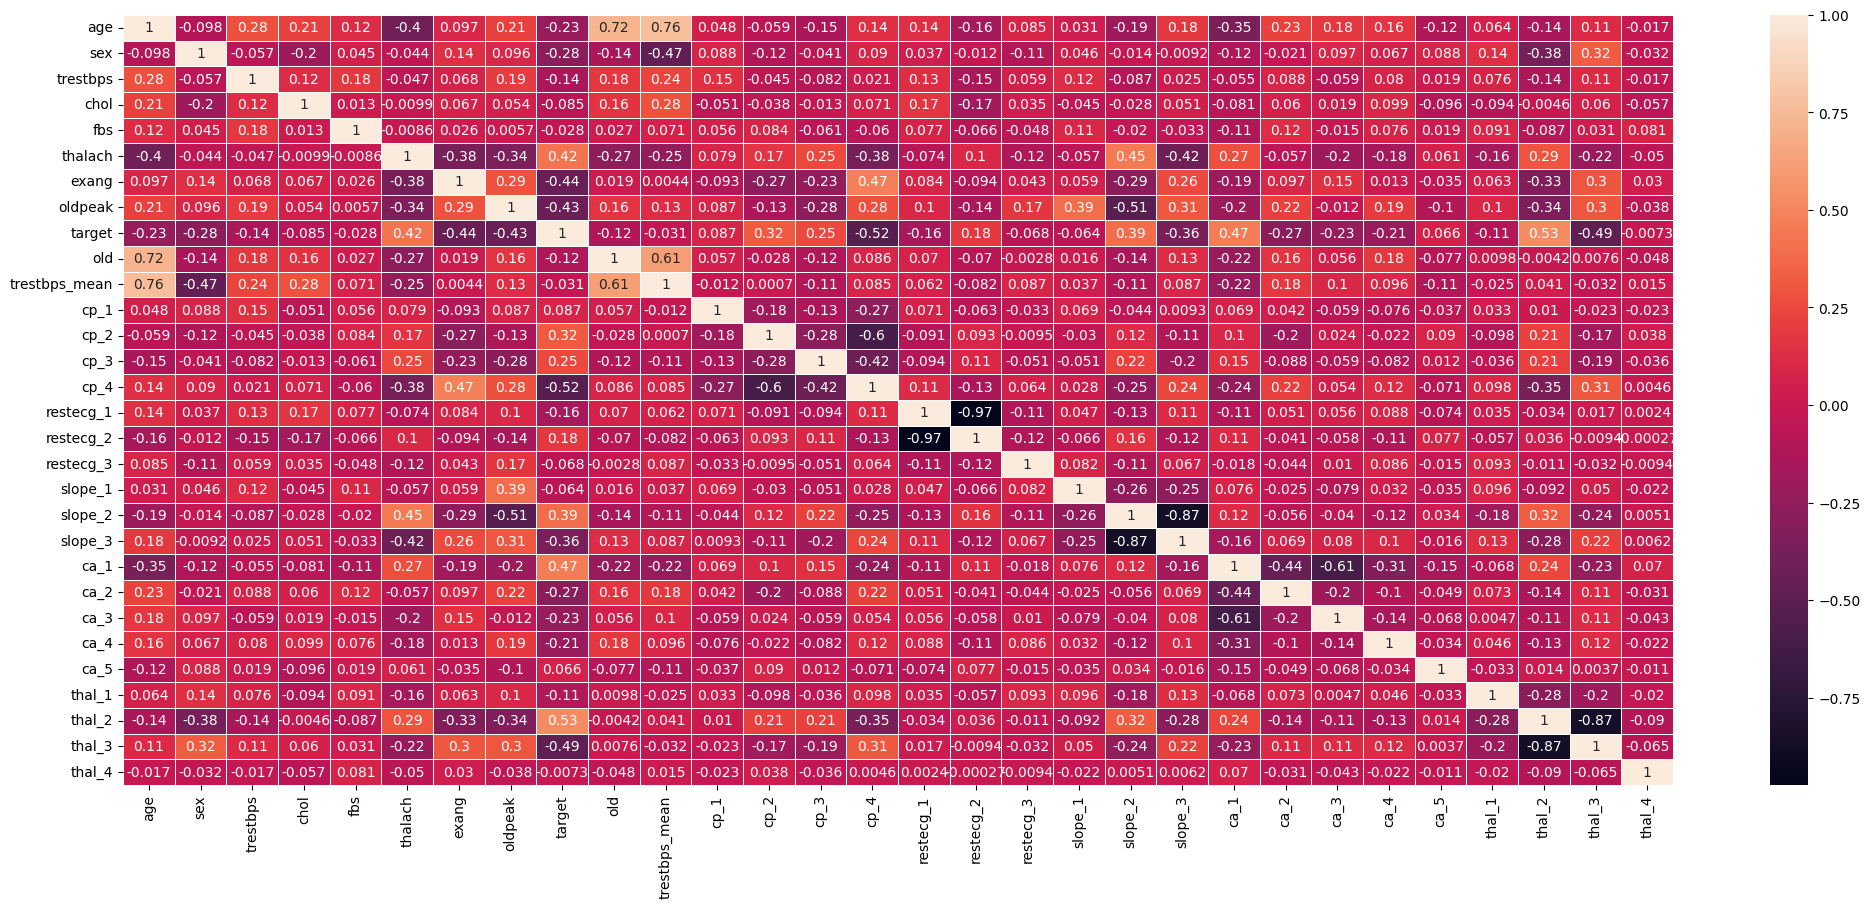

In [10]:
# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(heart.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)